<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ. <b>Выбор модели</b></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Векшин"  # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с предыдущими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>-</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-20%</b>, вторая неделя и далее до конца модуля <b>-40%</b>
      </p>
  </div>
</div>

<p><b>Задача 1.</b> Регрессия + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Reg_A5.csv"), регрессор - линейная регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить среднеквадратическую ошибку на тестовом подмножестве? (Степень полинома от 1 до 25)</p>
<p>
Построить графики:<br>
1) зависимости <b>среднеквадратической ошибки</b> от степени полинома для обучающего и проверочного подмножеств<br>
2) зависимости <b>R-квадрата</b> от степени полинома для обучающего и проверочного подмножеств<br>
3) функцию регрессии (наилучший случай) + исходные данные</p>

In [3]:
# 0) Подключение библиотек
import pandas as pnd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])

<p>1. Загрузка исходных данных</p>

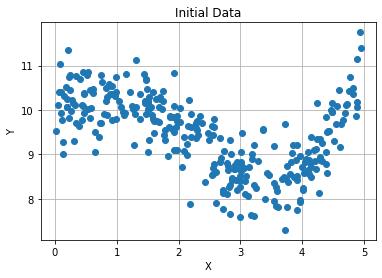

In [4]:
df = pnd.read_csv("../data/A2_Model_Selection/Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств двумя способами</p>

In [5]:
from sklearn import model_selection as ms

In [6]:
# Способ 1
x_train_init, x_test, y_train_init, y_test = ms.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = ms.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
# Воспользоваться KFold с параметрами n_splits=4, shuffle=True, random_state=0
# Можно использовать функцию cross_validate()

# Ваш код
kf = ms.KFold(n_splits=4, shuffle=True, random_state=0)

<p>3. Обучение</p>

In [7]:
# LinearRegression с нормализацией X

# Для способов 1 и 2

# Для способа 2
# Для каждой степени полинома ошибка обучения:
# MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)
# или Можно использовать функцию cross_validate()

# Для каждой степени полинома ошибка на проверочном подмножестве:
# MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)
# или Можно использовать функцию cross_validate()

# Ваш код
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X_train = x_train.reshape(-1,1)
X_val = x_val.reshape(-1,1)
X_train_init = x_train_init.reshape(-1,1)
MAX_POWER = 15

#Способ 1
characteristics = {i: {i: {i: list() for i in ["MSE", "R2"]} for i in ["train", "val"]} for i in range(1,3)}

for power in range(1, MAX_POWER):
    pf = PolynomialFeatures(degree=power)
    x_train_p = pf.fit_transform(X_train)
    x_val_p = pf.fit_transform(X_val)

    lr = LinearRegression(fit_intercept=False)
    lr.fit(x_train_p, y_train)
    y_train_pred = lr.predict(x_train_p)
    y_val_pred = lr.predict(x_val_p)
    
    characteristics[1]["train"]["MSE"].append(mean_squared_error(y_train, y_train_pred))
    characteristics[1]["val"]["MSE"].append(mean_squared_error(y_val, y_val_pred))
    characteristics[1]["train"]["R2"].append(r2_score(y_train, y_train_pred))
    characteristics[1]["val"]["R2"].append(r2_score(y_val, y_val_pred))

#Способ 2
for power in range(1, MAX_POWER):
    pf = PolynomialFeatures(degree=power)
    x_train_init_p = pf.fit_transform(X_train_init)
    
    lr = LinearRegression(fit_intercept=False)
    scores = ms.cross_validate(lr, x_train_init_p, y_train_init,
                               cv=kf,
                               scoring=["r2", "neg_mean_squared_error"],
                               return_train_score=True)
    characteristics[2]["train"]["MSE"].append(np.abs(scores["train_neg_mean_squared_error"]).mean())
    characteristics[2]["val"]["MSE"].append(np.abs(scores["test_neg_mean_squared_error"]).mean())
    characteristics[2]["train"]["R2"].append(scores["train_r2"].mean())
    characteristics[2]["val"]["R2"].append(scores["test_r2"].mean())

<p>4. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

<AxesSubplot:xlabel='Степень полинома', ylabel='MSE'>

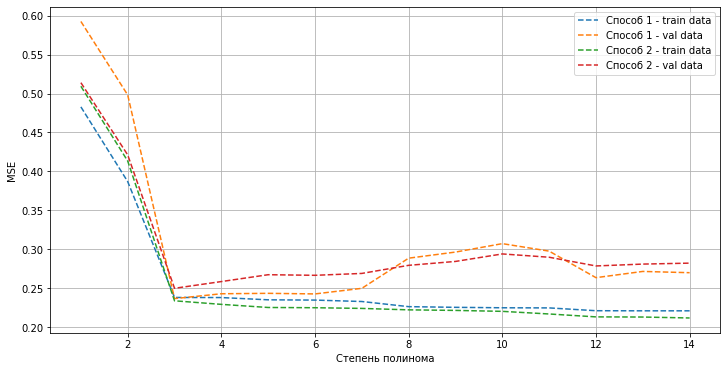

In [8]:
# Для способов 1 и 2

# Ваш код
polynom_powers = np.arange(1, MAX_POWER)

mydf = pd.DataFrame()
for mean, characteristic in characteristics.items():
    for t_type, subdict in characteristic.items():
        mydf = mydf.append(pd.DataFrame(subdict["MSE"], 
                                        columns = ["Способ {} - {} data".format(mean, t_type)], 
                                        index=polynom_powers))

mydf.plot(grid=True, xlabel="Степень полинома", ylabel="MSE", figsize=[12, 6], style='--')

<p>5. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

<AxesSubplot:xlabel='Степень полинома', ylabel='R2'>

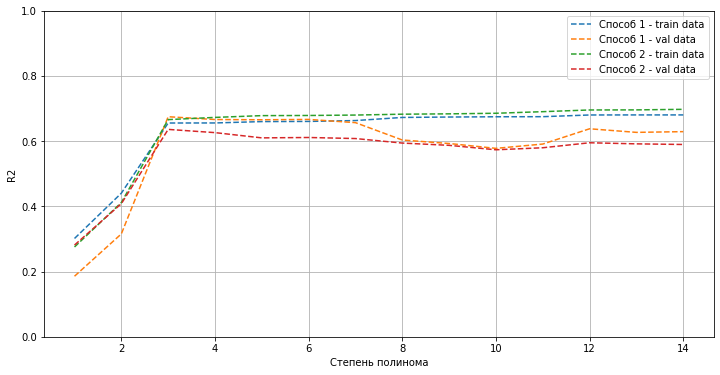

In [9]:
# Для способов 1 и 2

mydf = pd.DataFrame()
for mean, characteristic in characteristics.items():
    for t_type, subdict in characteristic.items():
        mydf = mydf.append(pd.DataFrame(subdict["R2"], 
                                        columns = ["Способ {} - {} data".format(mean, t_type)], 
                                        index=polynom_powers))

mydf.plot(grid=True, xlabel="Степень полинома", ylabel="R2", ylim=(0.0,1.0), figsize=[12, 6], style='--')

<p>6. Выбор степени полинома + повторное обучение модели на train_init</p>

In [10]:
# Для способов 1 и 2

# Ваш код
#Способ 1
min_mse_val = min(characteristics[1]["val"]["MSE"])
opt_power_1 = characteristics[1]["val"]["MSE"].index(min_mse_val) + 1

print("Оптимальная степень полинома = {}, MSE {}".format(opt_power_1, min_mse_val))

pf = PolynomialFeatures(degree=opt_power_1)
x_train_init_p = pf.fit_transform(x_train_init.reshape(-1, 1))
x_test_p = pf.fit_transform(x_test.reshape(-1, 1))

lr_init_1 = LinearRegression(fit_intercept=False)
lr_init_1.fit(x_train_init_p, y_train_init)

#Способ 2
mse_val_2 = characteristics[2]["val"]["MSE"]
min_mse_val = min(mse_val_2)
opt_power_2 = mse_val_2.index(min_mse_val) + 1

print("Оптимальная степень полинома = {}, MSE {}".format(opt_power_2, min_mse_val))

pf = PolynomialFeatures(degree=opt_power_2)
x_train_init_p = pf.fit_transform(x_train_init.reshape(-1, 1))

lr_init_2 = LinearRegression(fit_intercept=False)
scores = ms.cross_validate(lr_init_2, x_train_init_p, y_train_init, cv=kf, scoring=["r2", "neg_mean_squared_error"])

Оптимальная степень полинома = 3, MSE 0.2367030666985843
Оптимальная степень полинома = 3, MSE 0.24994390750827145


<p>7. Cреднеквадратическая ошибка на тестовом подмножестве</p>

In [11]:
# Для способов 1 и 2

# Ваш код
#Способ 1
y_test_pred_1 = lr_init_1.predict(x_test_p)
mse_1 = mean_squared_error(y_test, y_test_pred_1)
r2_1 = r2_score(y_test, y_test_pred_1)
print("MSE {}".format(mse_1))
print("R2 {}".format(r2_1))

#Способ 2
y_test_pred_2 = ms.cross_val_predict(lr_init_2, x_test_p, y_test, cv=kf)
mse_2 = np.abs(scores["test_neg_mean_squared_error"]).mean()
r2_2 = scores["test_r2"].mean()
print("MSE {}".format(mse_2))
print("R2 {}".format(r2_2))

MSE 0.22297660572404354
R2 0.7105706945726968
MSE 0.24994390750827145
R2 0.6358730839626137


<p>8. График функции регрессии (наилучший случай) + исходные данные</p>

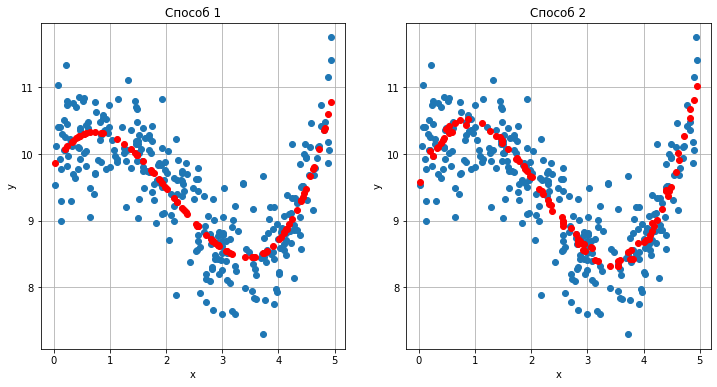

In [12]:
# Для способов 1 и 2

# Ваш код
plt.figure(figsize=[12, 6])

#Способ 1
plt.subplot(1,2,1)
plt.title("Способ 1")
plt.plot(x, y, "o")
plt.plot(x_test, y_test_pred_1, "o", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

#Способ 2
plt.subplot(1,2,2)
plt.title("Способ 2")
plt.plot(x, y, "o")
plt.plot(x_test, y_test_pred_2, "o", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

<p>9. Сравнение результатов для различных способов</p>

In [13]:
print("Способ 1: Степень полинома {}, MSE {}, R^2 = {}".format(opt_power_1, mse_1, r2_1))
print("Способ 2: Степень полинома {}, MSE {}, R^2 = {}".format(opt_power_2, mse_2, r2_2))

Способ 1: Степень полинома 3, MSE 0.22297660572404354, R^2 = 0.7105706945726968
Способ 2: Степень полинома 3, MSE 0.24994390750827145, R^2 = 0.6358730839626137


<p><b>Задача 2.</b> Классификация + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Cl_A5_Vx.csv"), классификатор - логистическая регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить долю правильных классификаций на тестовом подмножестве?</p>
<p>
Построить графики:<br>
1) зависимости доли правильных классификаций от <b>степени полинома</b> для обучающего и проверочного подмножеств<br>
2) зависимости доли правильных классификаций от <b>количества итераций</b> для обучающего и проверочного подмножеств для наилучшего случая<br>
3) результат классификации для наилучшего случая (степень полинома) для обучающего и проверочного подмножеств</p>
4) результат классификации для тестового подмножества</p>

<p>1. Загрузка исходных данных</p>

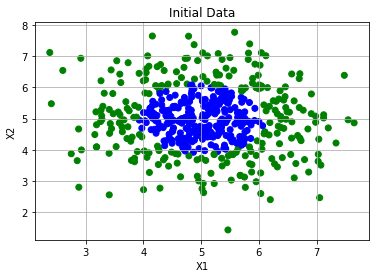

In [14]:
df = pnd.read_csv("../data/A2_Model_Selection/Cl_A5_V"+str(variant)+".csv")  # variant - вариант задания

plt.title("Initial Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(df.X1, df.X2, c=df.Y, cmap=clrMap)
plt.grid(True)
plt.show()

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств</p>

In [15]:
x = np.array(df.drop(["Y"], axis=1))
y = np.array(df["Y"])

# Способ 1
x_train_init, x_test, y_train_init, y_test = ms.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = ms.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
# Воспользоваться KFold с параметрами n_splits=4, shuffle=True, random_state=0
# или Можно использовать функцию cross_validate()

kf = ms.KFold(n_splits=4, shuffle=True, random_state=0)

<p>3. Обучение</p>

In [16]:
# Параметры классификатора
# penalty="l2", fit_intercept=True, max_iter=x, C=1e5, solver="liblinear", random_state=12345

# Для способов 1 и 2

# Для способа 2
# Для каждой степени полинома ошибка обучения:
# MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)
# или Можно использовать функцию cross_validate()

# Для каждой степени полинома ошибка на проверочном подмножестве:
# MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)
# или Можно использовать функцию cross_validate()

# Ваш код
from sklearn.linear_model import LogisticRegression

#Способ 1
score_train_1, score_val_1 = list(), list()
for power in range(1, MAX_POWER):
    pf = PolynomialFeatures(degree=power)
    x_train_p = pf.fit_transform(x_train)
    x_val_p = pf.fit_transform(x_val)
    
    lgr_1 = LogisticRegression(penalty="l2", 
                               fit_intercept=True, 
                               C=1e5, 
                               solver="liblinear", 
                               random_state=12345)
    lgr_1.fit(x_train_p, y_train)
    
    score_train_1.append(lgr_1.score(x_train_p, y_train))
    score_val_1.append(lgr_1.score(x_val_p, y_val))
    
#Способ 2
score_train_2, score_val_2 = list(), list()
for power in range(1, MAX_POWER):
    pf = PolynomialFeatures(degree=power)
    x_train_init_p = pf.fit_transform(x_train_init)
    
    lgr_2 = LogisticRegression(penalty="l2", 
                               fit_intercept=True, 
                               C=1e5, 
                               solver="liblinear", 
                               random_state=12345)    
    score = ms.cross_validate(lgr_2, 
                              x_train_init_p, 
                              y_train_init, 
                              cv=kf,
                              scoring="accuracy", 
                              return_train_score=True)
    
    score_train_2.append(score["train_score"].mean())
    score_val_2.append(score["test_score"].mean())

<p>4. Графики зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств</p>

<AxesSubplot:xlabel='Степень полинома', ylabel='Точность'>

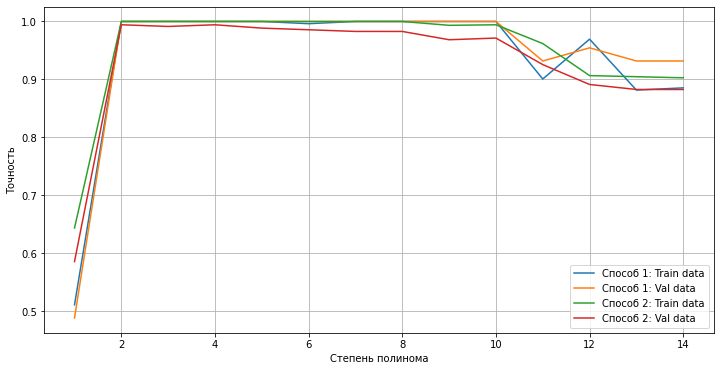

In [17]:
# Для способов 1 и 2

# Ваш код
mydf = pd.DataFrame()
mydf = mydf.append(pd.DataFrame(score_train_1, columns = ["Способ 1: Train data"], index=polynom_powers))
mydf = mydf.append(pd.DataFrame(score_val_1, columns = ["Способ 1: Val data"], index=polynom_powers))
mydf = mydf.append(pd.DataFrame(score_train_2, columns = ["Способ 2: Train data"], index=polynom_powers))
mydf = mydf.append(pd.DataFrame(score_val_2, columns = ["Способ 2: Val data"], index=polynom_powers))
mydf.plot(grid=True, xlabel="Степень полинома", ylabel="Точность", figsize=[12, 6])

In [18]:
max_val_score = max(score_val_1)
opt_power_1 = score_val_1.index(max_val_score) + 1
max_val_score = max(score_val_2)
opt_power_2 = score_val_2.index(max_val_score) + 1

print("Способ 1: Оптимальная степень полинома = {}".format(opt_power_1))
print("Способ 2: Оптимальная степень полинома = {}".format(opt_power_2))

Способ 1: Оптимальная степень полинома = 2
Способ 2: Оптимальная степень полинома = 2


<p>5. Графики зависимости доли правильных классификаций от количества итераций для обучающего (train) и проверочного подмножеств для наилучшего случая - изменение параметра max_iter</p>

In [19]:
# Для способов 1 и 2

# Ваш код
iterations = np.arange(1, 50, 1)

#Cпособ 1
iter_score_train_1, iter_score_val_1 = list(), list()

pf = PolynomialFeatures(degree=opt_power_1)
x_train_p = pf.fit_transform(x_train)
x_val_p = pf.fit_transform(x_val)
    
for iteration in iterations:
    lgr_1 = LogisticRegression(penalty="l2", 
                               fit_intercept=True, 
                               max_iter=iteration,
                               C=1e5, 
                               solver="liblinear", 
                               random_state=12345)
    lgr_1.fit(x_train_p, y_train)
    
    iter_score_train_1.append(lgr_1.score(x_train_p, y_train))
    iter_score_val_1.append(lgr_1.score(x_val_p, y_val))

#Cпособ 2
iter_score_train_2, iter_score_val_2 = list(), list()

pf = PolynomialFeatures(degree=opt_power_2)
x_train_init_p = pf.fit_transform(x_train_init)
    
for iteration in iterations:
    lgr_2 = LogisticRegression(penalty="l2", 
                               fit_intercept=True, 
                               max_iter=iteration,
                               C=1e5, 
                               solver="liblinear", 
                               random_state=12345)
    scores = ms.cross_validate(lgr_2, 
                               x_train_init_p, 
                               y_train_init, 
                               cv=kf,
                               scoring="accuracy", 
                               return_train_score=True)
    
    iter_score_train_2.append(scores["train_score"].mean())
    iter_score_val_2.append(scores["test_score"].mean())

/home/roman/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/roman/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/roman/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/roman/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/roman/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the 

/home/roman/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/roman/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/roman/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/roman/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/roman/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the 

<AxesSubplot:xlabel='Степень полинома', ylabel='Точность'>

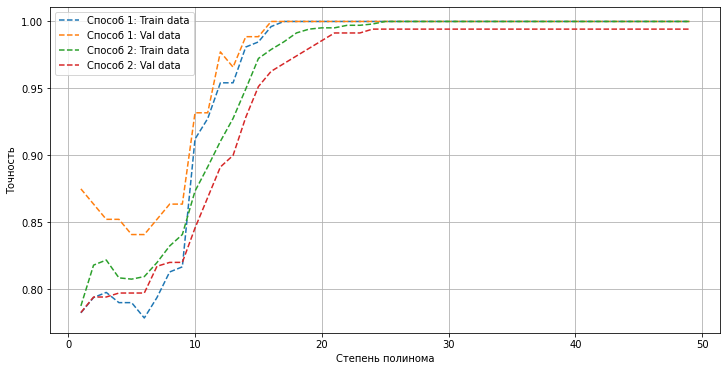

In [20]:
mydf = pd.DataFrame()
mydf = mydf.append(pd.DataFrame(iter_score_train_1, columns = ["Способ 1: Train data"], index=iterations))
mydf = mydf.append(pd.DataFrame(iter_score_val_1, columns = ["Способ 1: Val data"], index=iterations))
mydf = mydf.append(pd.DataFrame(iter_score_train_2, columns = ["Способ 2: Train data"], index=iterations))
mydf = mydf.append(pd.DataFrame(iter_score_val_2, columns = ["Способ 2: Val data"], index=iterations))
mydf.plot(grid=True, xlabel="Степень полинома", ylabel="Точность", figsize=[12, 6], logx=False, style='--')

<p>6. Повторное обучение на train_init наилучшей модели по данным из пункта 4</p>

In [21]:
# Для способов 1 и 2

# Ваш код
from sklearn.metrics import accuracy_score

#Способ 1
opt_iteration = 35

pf = PolynomialFeatures(degree=opt_power_1)
x_train_init_p_1 = pf.fit_transform(x_train_init)
x_test_p_1 = pf.fit_transform(x_test)

lgr_1 = LogisticRegression(penalty="l2", fit_intercept=True,
                             max_iter=opt_iteration, C=1e5, solver="liblinear", random_state=12345)
lgr_1.fit(x_train_init_p_1, y_train_init)
y_test_pred_1 = lgr_1.predict(x_test_p_1)

#Способ 2
pf = PolynomialFeatures(degree=opt_power_2)
x_train_init_p_2 = pf.fit_transform(x_train_init)
x_test_p_2 = pf.fit_transform(x_test)

lgr_2 = LogisticRegression(penalty="l2", fit_intercept=True,
                             max_iter=opt_iteration, C=1e5, solver="liblinear", random_state=12345)
scores = ms.cross_validate(lgr_2, x_train_init_p_2, y_train_init, cv=kf, scoring="accuracy")
y_test_pred_2 = ms.cross_val_predict(lgr_2, x_test_p_2, y_test, cv=kf)

print("Способ 1: Точность {}".format(accuracy_score(y_test, y_test_pred_1)))
print("Способ 2: Точность {}".format(accuracy_score(y_test, y_test_pred_2)))

Способ 1: Точность 1.0
Способ 2: Точность 0.9866666666666667


In [22]:
from matplotlib import cm

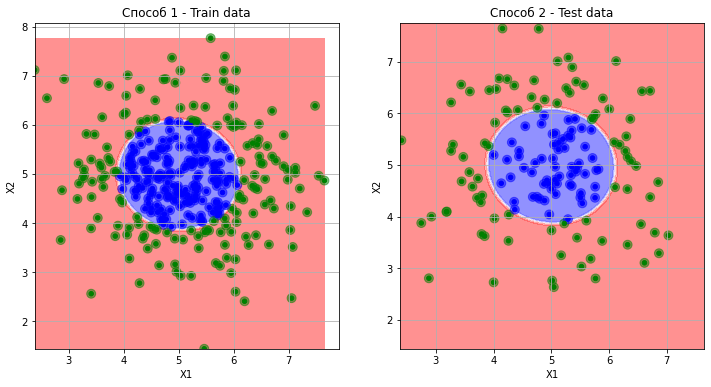

In [23]:
#Способ 1
plt.figure(figsize=[12, 6])
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]

pf = PolynomialFeatures(degree=opt_power_1)
points_1 = pf.fit_transform(points)

Z = lgr_1.predict_proba(points_1)[:, 1].reshape(xx.shape)

plt.subplot(1,2,1)
plt.title("Способ 1 - Train data")
plt.contourf(xx, yy, Z, cmap=cm.bwr, alpha=.5)
plt.scatter(x_train_init[:,0], x_train_init[:,1], c=y_train_init, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train_init[:, 0], x_train_init[:, 1], c=lgr_1.predict(x_train_init_p_1), s=20, cmap=clrMap)
plt.grid(True)
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(1,2,2)
plt.title("Способ 2 - Test data")
plt.contourf(xx, yy, Z, cmap=cm.bwr, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=lgr_1.predict(x_test_p_1), s=20, cmap=clrMap)
plt.grid(True)
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

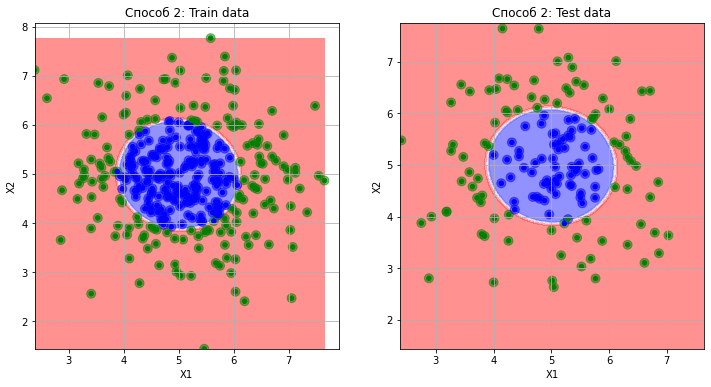

In [24]:
#Способ 2
plt.figure(figsize=[12, 6])

plt.subplot(1,2,1)
plt.title("Способ 2: Train data")
plt.contourf(xx, yy, Z, cmap=cm.bwr, alpha=.5)
plt.scatter(x_train_init[:,0], x_train_init[:,1], c=y_train_init, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train_init[:,0], x_train_init[:,1],
            c=ms.cross_val_predict(lgr_2, x_train_init_p_2, y_train_init, cv=kf), s=20, cmap=clrMap)
plt.grid(True)
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(1,2,2)
plt.title("Способ 2: Test data")
plt.contourf(xx, yy, Z, cmap=cm.bwr, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1],
            c=ms.cross_val_predict(lgr_2, x_test_p_2, y_test, cv=kf), s=20, cmap=clrMap)
plt.grid(True)
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

<p><b>Задача 3.</b> Регрессия + регуляризация</p>

<p>1. Загрузка исходных данных</p>

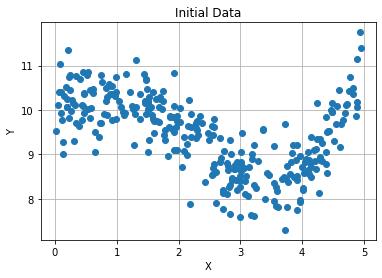

In [25]:
df = pnd.read_csv("../data/A2_Model_Selection/Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Обучение с кросс-валидацией (см. задачу 1 способ 2) и с использованием Ridge при различных значениях коэф. регуляризации</p>

In [26]:
# Регрессор - Ridge
# Параметры: a fit_intercept=True, normalize=True, random_state=12345
# Здесь и далее СТЕПЕНЬ ПОЛИНОМА - 16!!!

# Коэф. регуляризации
alphas = np.append([0.0], np.logspace(-8, 1, 20, base=10))

# Для каждого значения коэф. регуляризации:
# MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)
# или Можно использовать функцию cross_validate()

# Для каждой степени полинома ошибка на проверочном подмножестве:
# MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)
# или Можно использовать функцию cross_validate()

# Ваш код

In [27]:
from sklearn.linear_model import Ridge

In [28]:
x_train_init, x_test, y_train_init, y_test = ms.train_test_split(x, y, test_size=0.3, random_state=0)
kf = ms.KFold(n_splits=4, shuffle=True, random_state=0)

pf = PolynomialFeatures(degree=16)
x_train_init_p = pf.fit_transform(x_train_init.reshape(-1, 1))
x_test_p = pf.fit_transform(x_test.reshape(-1, 1))

mse_train, mse_val = list(), list()
r2_train, r2_val = list(), list()
for alpha in alphas:
    ridge = Ridge(alpha=alpha, fit_intercept=True, normalize=True, random_state=12345)
    scores = ms.cross_validate(ridge, x_train_init_p, y_train_init, cv=kf,
                               scoring=["r2", "neg_mean_squared_error"], return_train_score=True)
    
    mse_train.append(np.abs(scores["train_neg_mean_squared_error"]).mean())
    mse_val.append(np.abs(scores["test_neg_mean_squared_error"]).mean())
    r2_train.append(scores["train_r2"].mean())
    r2_val.append(scores["test_r2"].mean())

<p>3. Графики зависимости среднеквадратической ошибки от коэффициента регуляризации для обучающего и проверочного подмножеств</p>

<AxesSubplot:xlabel='Alpha (log-scaled)', ylabel='MSE'>

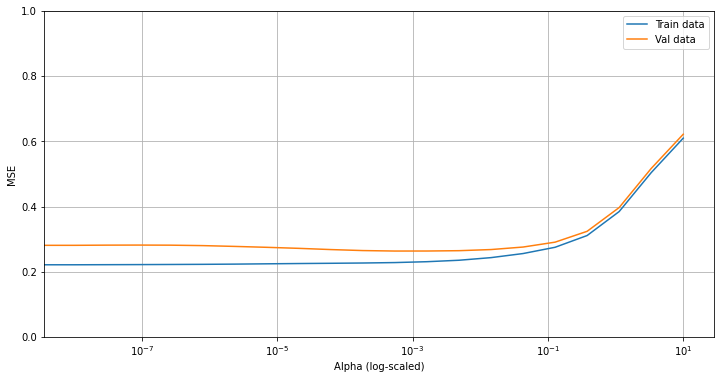

In [29]:
# Ваш код
mydf = pd.DataFrame()
mydf = mydf.append(pd.DataFrame(mse_train, columns = ["Train data"], index=alphas))
mydf = mydf.append(pd.DataFrame(mse_val, columns = ["Val data"], index=alphas))
mydf.plot(grid=True, xlabel="Alpha (log-scaled)", ylabel="MSE", ylim=(0.0,1.0), logx=True, figsize=[12, 6])

<p>4. Графики зависимости R-квадрата от коэффициента регуляризации для обучающего и проверочного подмножеств</p>

<AxesSubplot:xlabel='Alpha (log-scaled)', ylabel='R2'>

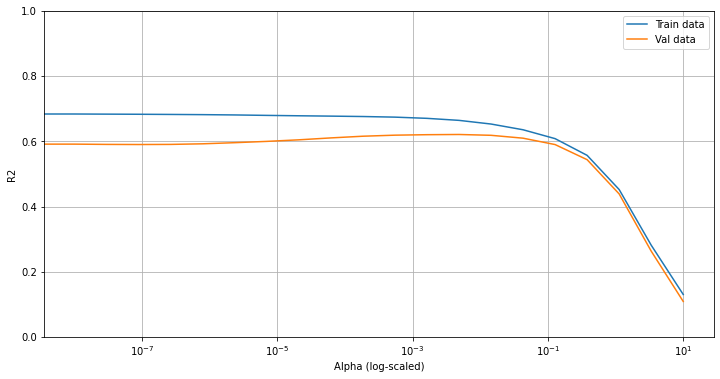

In [30]:
# Ваш код
mydf = pd.DataFrame()
mydf = mydf.append(pd.DataFrame(r2_train, columns = ["Train data"], index=alphas))
mydf = mydf.append(pd.DataFrame(r2_val, columns = ["Val data"], index=alphas))
mydf.plot(grid=True, xlabel="Alpha (log-scaled)", ylabel="R2", ylim=(0.0,1.0), logx=True, figsize=[12, 6])

<p>5. Найти коэф. рег. с минимальной ошибкой на val</p>

In [31]:
# Ваш код
min_mse = min(mse_val)
opt_alpha = alphas[mse_val.index(min_mse)]

print("Минимальная ошибка {}, alpha {}".format(min_mse, opt_alpha))

Минимальная ошибка 0.2635448507186402, alpha 0.0005455594781168515


<p>8. Обучение на train_init с использованием Ridge и параметром alpha=(значение из пункта 2)</p>

In [32]:
# Ваш код
ridge = Ridge(alpha=opt_alpha, fit_intercept=True, normalize=True, random_state=12345)
scores = ms.cross_validate(ridge, x_train_init_p, y_train_init, cv=kf,
                              scoring=["r2", "neg_mean_squared_error"], return_train_score=True)

print("MSE {}".format(np.abs(scores["test_neg_mean_squared_error"]).mean()))
print("R2 {}".format(scores["test_r2"].mean()))

MSE 0.2635448507186402
R2 0.6187979108218294


<p>9. Определить ошибку на тестовом подмножестве</p>

In [33]:
# Ваш код
y_test_predict = ms.cross_val_predict(ridge, x_test_p, y_test, cv=kf)
mse_test = mean_squared_error(y_test, y_test_predict)
print("MSE на тестовом подмножестве {}".format(mse_test))

MSE на тестовом подмножестве 0.253573834957747


<p>10. Построить график регрессии</p>

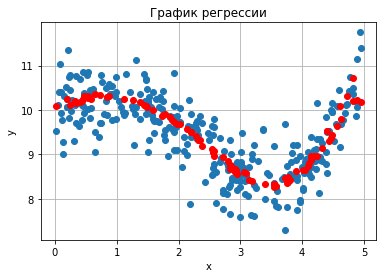

In [34]:
# Ваш код
plt.title("График регрессии")
plt.plot(x, y, "o")
plt.plot(x_test, y_test_predict, "o", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

<p>11. Сделать заключение о влиянии коэффициента регуляризации</p>

Коэффициент регуляризации позволяет не обучать слишком сложную модель за счёт введения штрафа за сложность и снизить влияние выбросов на предсказание.